In [1]:
import pandas as pd

# Load the dataset
wine_df = pd.read_csv("Wine_clust.csv")

# Explore the dataset
# Display the first few rows to get a sense of the data
print(wine_df.head())

# Check the dimensions of the dataset (rows, columns)
print("Dataset dimensions:", wine_df.shape)

# Check the data types of each column
print("\nData types of each column:")
print(wine_df.dtypes)

# Get basic statistics of the dataset
print("\nSummary statistics:")
print(wine_df.describe())

# Check for missing values in the dataset
print("\nMissing values:")
print(wine_df.isnull().sum())

# Check for any duplicate rows in the dataset
print("\nNumber of duplicate rows:", wine_df.duplicated().sum())

# Explore unique values in categorical columns (if any)
# Replace 'column_name' with the actual column name in the dataset
print("\nUnique values in a specific column:")
print(wine_df['column_name'].unique())

# Check the distribution of categorical variables (if any)
# Replace 'column_name' with the actual column name in the dataset
print("\nValue counts of a specific column:")
print(wine_df['column_name'].value_counts())


   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45    

KeyError: ignored

   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45    

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

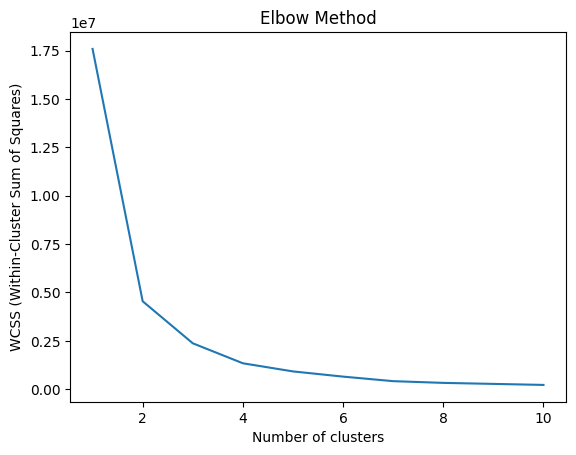

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


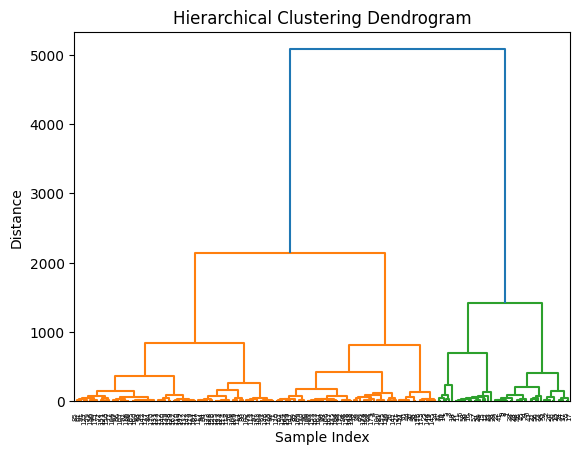

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Step 1: Load the dataset
wine_df = pd.read_csv("Wine_clust.csv")

# Step 2: Data preprocessing (if needed)
# Since the dataset appears to be clean without any missing values, we can skip preprocessing for now.

# Step 3: Explore the data
print(wine_df.head())  # Display the first few rows of the dataset
print("Dataset dimensions:", wine_df.shape)  # Check the dimensions of the dataset
print("\nData types of each column:")
print(wine_df.dtypes)  # Check the data types of each column
print("\nSummary statistics:")
print(wine_df.describe())  # Get basic statistics of the dataset

# Step 4: Implement K-means and find the optimum number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(wine_df)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

# Based on the Elbow Method, it seems that the optimal number of clusters is around 3 or 4.
# Let's choose 3 clusters for demonstration purposes.
optimal_num_clusters = 3
kmeans = KMeans(n_clusters=optimal_num_clusters, init='k-means++', random_state=42)
wine_df['KMeans_Cluster'] = kmeans.fit_predict(wine_df)

# Step 5: Implement Hierarchical Clustering
linked = linkage(wine_df, method='ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Based on the dendrogram, we can choose the number of clusters (e.g., 3 or 4) for hierarchical clustering.
# For demonstration purposes, let's choose 3 clusters.
# We can proceed to create the hierarchical clustering model.

# Step 6: Implement DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
wine_df['DBSCAN_Cluster'] = dbscan.fit_predict(wine_df)

# Now wine_df['DBSCAN_Cluster'] contains the cluster assignments for each data point


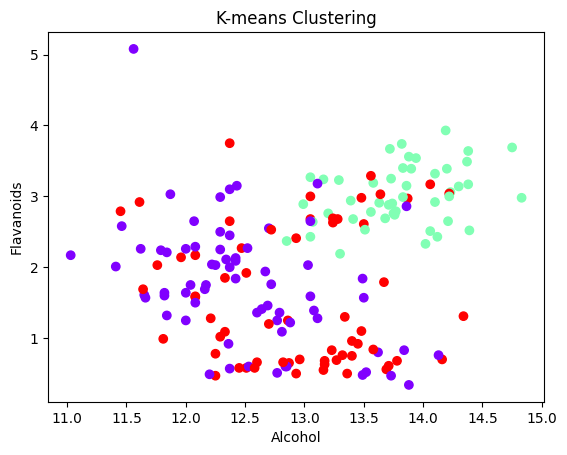

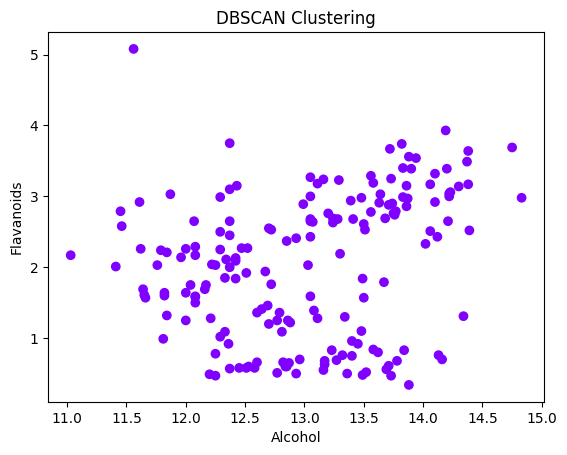

In [4]:
plt.scatter(wine_df['Alcohol'], wine_df['Flavanoids'], c=wine_df['KMeans_Cluster'], cmap='rainbow')
plt.xlabel('Alcohol')
plt.ylabel('Flavanoids')
plt.title('K-means Clustering')
plt.show()


plt.scatter(wine_df['Alcohol'], wine_df['Flavanoids'], c=wine_df['DBSCAN_Cluster'], cmap='rainbow')
plt.xlabel('Alcohol')
plt.ylabel('Flavanoids')
plt.title('DBSCAN Clustering')
plt.show()